In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df = pd.read_csv('sgemm_product.csv')

In [13]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [14]:
df['Run'] = (df['Run1 (ms)'] + df['Run2 (ms)'] + df['Run3 (ms)'] + df['Run4 (ms)'] )/4
data = df.copy()

In [15]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [16]:
df["Binary_Run"] = (df["Run"] >= df["Run"].median()).astype(int)
df["Binary_Run"].value_counts()

1    120801
0    120799
Name: Binary_Run, dtype: int64

In [17]:
df = df.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)','Run'],axis=1)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Binary_Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1


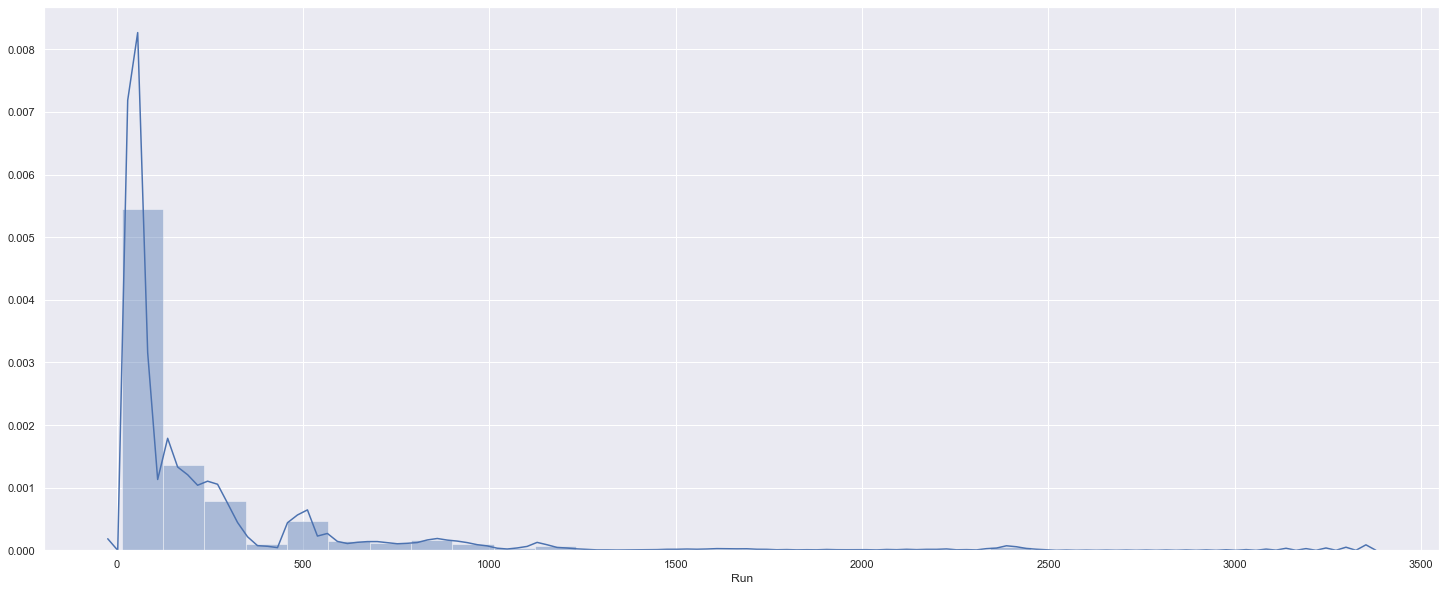

In [18]:
plt.figure(figsize=(25,10))
sns.distplot(data['Run'],bins=30)

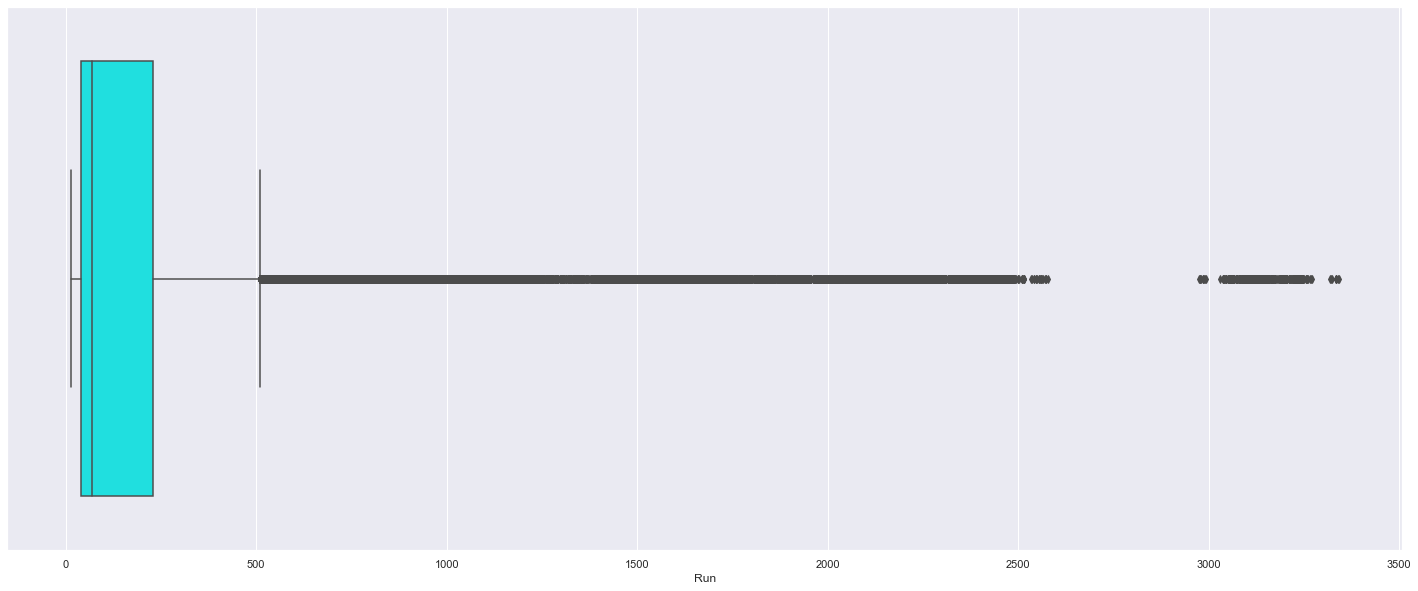

In [19]:
sns.set()
plt.figure(figsize=(25,10))
sns.boxplot(data['Run'],color = 'cyan')

In [20]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.shape[0], y.shape[0])

241600 241600


In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [22]:
y_train.shape[0]

169120

In [23]:
X_train.shape[0]

169120

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [55]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='random')

In [26]:
clf_1 = DecisionTreeClassifier(random_state=0,max_depth=8,min_samples_split=5)

In [67]:
clf_2 = DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_split=2,criterion='entropy',splitter='random')

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
adab = AdaBoostClassifier( DecisionTreeClassifier(),n_estimators=300, random_state=0)

In [68]:
clf_2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')

In [103]:
y_pred = clf.predict(X_test) #without pruning

In [104]:
accuracy_score(y_test, y_pred)

0.9906456953642384

In [105]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[35794   332]
 [  346 36008]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     36126
           1       0.99      0.99      0.99     36354

    accuracy                           0.99     72480
   macro avg       0.99      0.99      0.99     72480
weighted avg       0.99      0.99      0.99     72480



In [34]:
clf_1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [35]:
y_pred1 = clf_1.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred1)

0.926103752759382

In [37]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test,y_pred1))

[[34535  1591]
 [ 3765 32589]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     36126
           1       0.95      0.90      0.92     36354

    accuracy                           0.93     72480
   macro avg       0.93      0.93      0.93     72480
weighted avg       0.93      0.93      0.93     72480



In [72]:
adab.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [73]:
y_pred2 = adab.predict(X_test)

In [74]:
accuracy_score(y_test, y_pred2)

0.9915424944812362

In [75]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test,y_pred2))

[[35811   315]
 [  298 36056]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     36126
           1       0.99      0.99      0.99     36354

    accuracy                           0.99     72480
   macro avg       0.99      0.99      0.99     72480
weighted avg       0.99      0.99      0.99     72480



K-Fold Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=clf_1,X = X_train,y=y_train,cv=10,n_jobs=-1)
accuracies1 = cross_val_score(estimator=adab,X = X_train,y=y_train,cv=10,n_jobs=-1)


In [43]:
print(accuracies)

[0.92656102 0.92596973 0.92585147 0.92289499 0.92514191 0.92573321
 0.9275071  0.92242195 0.92295412 0.92561495]


In [44]:
print(accuracies1)

[0.98610454 0.98616367 0.98758278 0.98527673 0.98604541 0.98645932
 0.98687323 0.98592715 0.98663671 0.98640019]


In [45]:
print(accuracies.mean())

0.9250650425733207


In [46]:
print(accuracies1.mean())

0.9863469725638601


# Learning Curves for Decision Tree and Boosting

In [47]:
from sklearn.model_selection import learning_curve

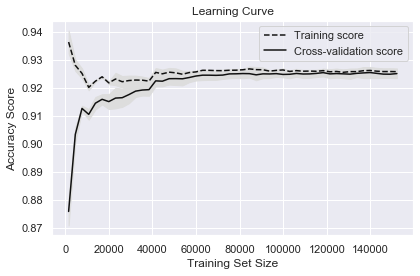

In [48]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(clf_1, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

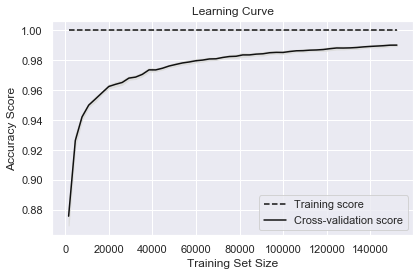

In [76]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(adab, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [249]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

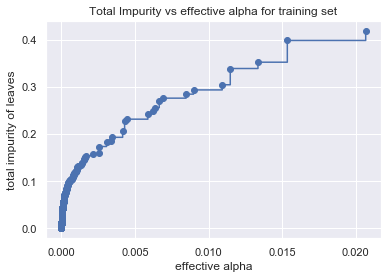

In [250]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [252]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08122813634429155


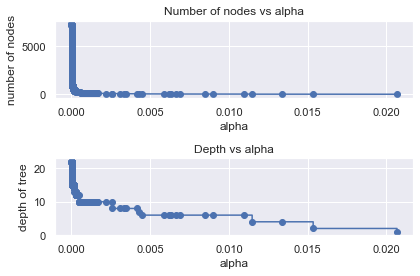

In [253]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

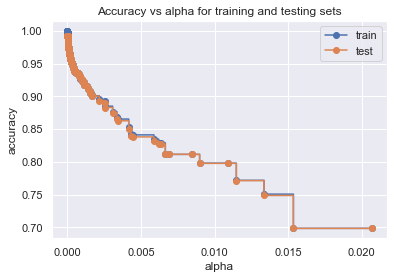

In [254]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [91]:
from sklearn.metrics import make_scorer,f1_score,fbeta_score
from sklearn.model_selection import GridSearchCV
# Initialize the classifier


#  Create the parameters list you wish to tune, using a dictionary if needed.

param_grid = {"criterion" : ['gini', 'entropy'],
              "splitter" :   ['best', 'random'],
              'max_depth':[2,4,6,8],'min_samples_leaf':[2,4,6,8],
              'min_samples_split':[2,4,6]              
             }
#parameters = {'max_features':[1],'n_estimators':[10,12]}
scorer = make_scorer(f1_score)


grid_obj = GridSearchCV(clf, param_grid, scoring=scorer)
# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
print(best_clf)
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
Unoptimized model
------
Accuracy score on testing data: 0.9906
F-score on testing data: 0.9908

Optimized Model
------
Final accuracy score on the testing data: 0.9262
Final F-score on the testing data: 0.9356


In [102]:
from sklearn.metrics import make_scorer,f1_score,fbeta_score
from sklearn.model_selection import GridSearchCV

DTC = DecisionTreeClassifier(random_state = 11)

ABC = AdaBoostClassifier(base_estimator = DTC)

parameters = {'n_estimators':[10,12,14],'learning_rate':[0.2,0.5,0.8,1.0]}
scorer = make_scorer(f1_score)

#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(adab, parameters, scoring=scorer)
#grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
print(best_clf)
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

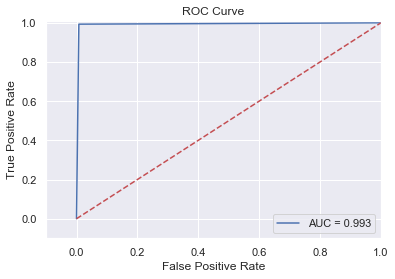

In [106]:
#For boosting ROC Curve
from sklearn.metrics import roc_curve,auc
#from sklearn import metrics
def roc_auc(y_test,y_pred):
    sns.set()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
    roc_auc = auc(fpr,tpr)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend()
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
roc_auc(predictions,y_test)

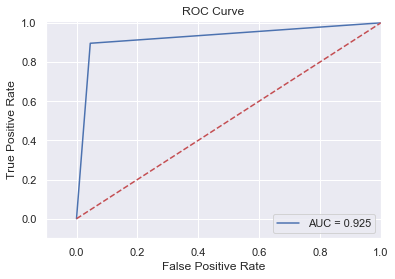

In [107]:

from sklearn.metrics import roc_curve,auc
#from sklearn import metrics
def roc_auc(y_test,y_pred):
    sns.set()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
    roc_auc = auc(fpr,tpr)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend()
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
roc_auc(predictions,y_test)